Full name: Lastname, Firstname

Perm number: 

Change the filename to HW3_ followed by your last name and first name with an underscore between them. For example, Abraham Lincoln's homework filename would be "HW3_Lincoln_Abraham.ipynb"

### **Week 3, Homework**

---

#### Problem 1 (1 pt)

Let's begin with a warming-up problem. We learned how to write a one-line funciton to count the number of base occuring in a sequence, using list comprehension or generator expression. (See implementations of "base_count()".)

Write a one line function to calculate the percent occurrence of each base. The outcome should look like below.

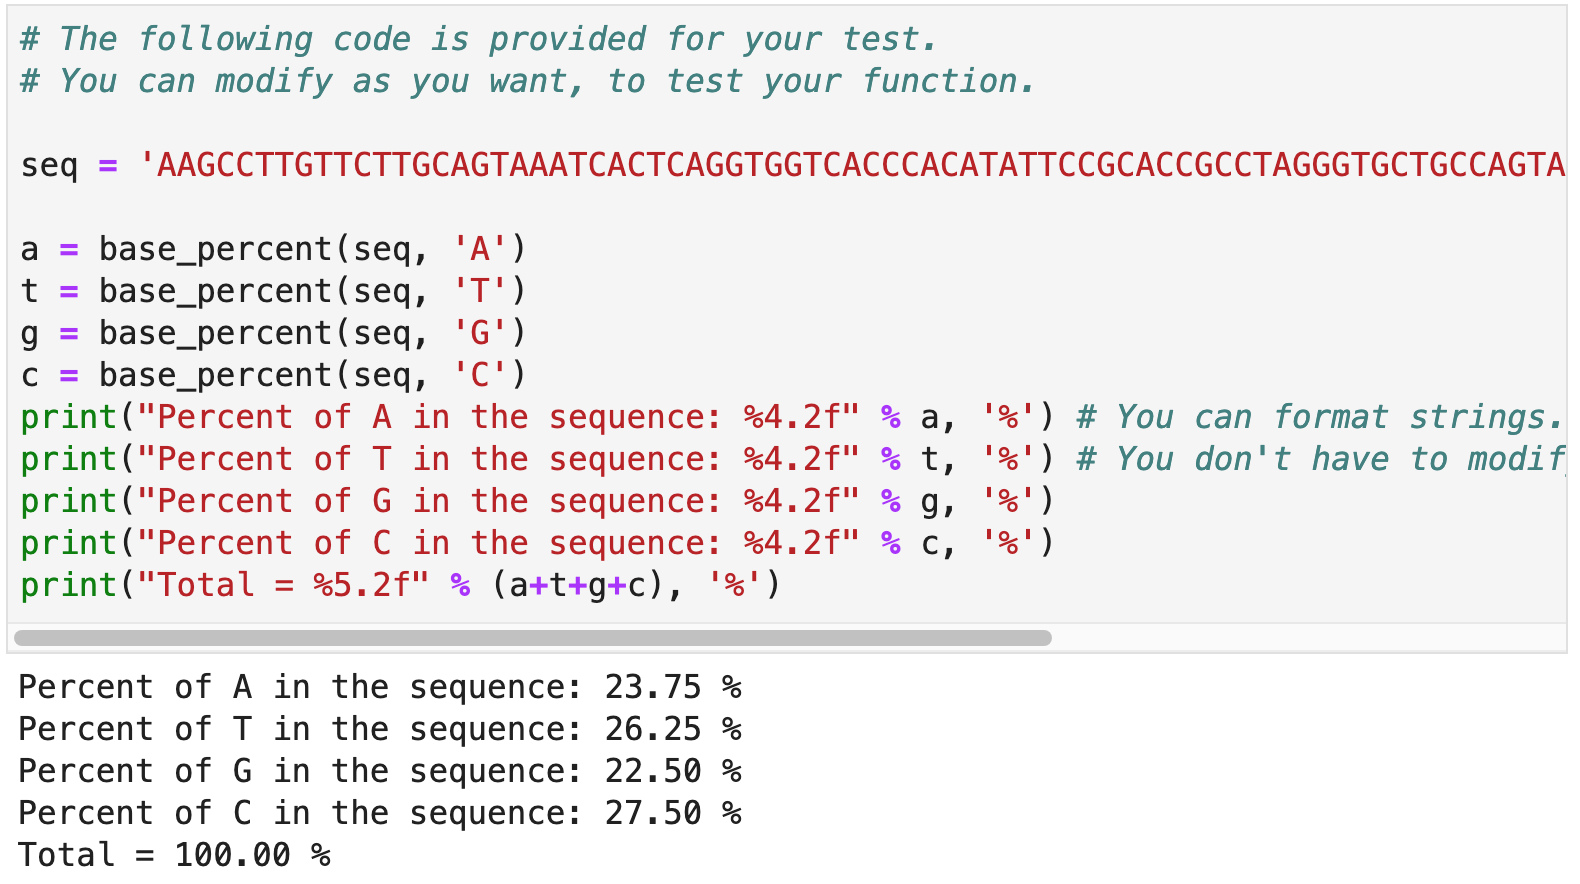

In [2]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def base_percent(seq, base):
    return sum([c == base for c in seq])/len(seq)*100

In [3]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

seq = 'AAGCCTTGTTCTTGCAGTAAATCACTCAGGTGGTCACCCACATATTCCGCACCGCCTAGGGTGCTGCCAGTAATGATATG'

a = base_percent(seq, 'A')
t = base_percent(seq, 'T')
g = base_percent(seq, 'G')
c = base_percent(seq, 'C')
print("Percent of A in the sequence: %4.2f" % a, '%') # You can format strings. See string_err_fileIO_debugging.ipynb
print("Percent of T in the sequence: %4.2f" % t, '%') # You don't have to modify these lines.
print("Percent of G in the sequence: %4.2f" % g, '%')
print("Percent of C in the sequence: %4.2f" % c, '%')
print("Total = %5.2f" % (a+t+g+c), '%')

Percent of A in the sequence: 23.75 %
Percent of T in the sequence: 26.25 %
Percent of G in the sequence: 22.50 %
Percent of C in the sequence: 27.50 %
Total = 100.00 %


---

#### Problem 2 (1 pt)

We are simplifying the `create_mRNA()` function. Specifically, we want to implement it in a single line. But there are errors. Find what went wrong and fix them.

The outcome should look like this.

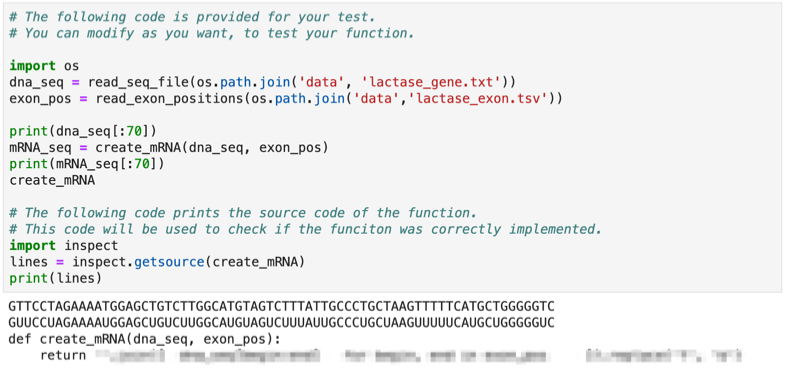

In [4]:
# This cell is given. Run this cell. DO NOT modify this cell

def read_seq_file(filename):
    lines = open(filename,'r').readlines()
    return ''.join([  line.strip() for line in lines  ])

def read_exon_positions(filename):
    return [ tuple(int(num_str) for num_str in line.split() ) for line in open(filename, 'r') ]

In [5]:
# Fix the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def create_mRNA(dna_seq, exon_pos):
    return ''.join([  dna_seq[begin:end]   for begin, end in exon_pos     ]).replace('T', 'U')

In [9]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

import os
dna_seq = read_seq_file(os.path.join('data', 'lactase_gene.txt'))
exon_pos = read_exon_positions(os.path.join('data','lactase_exon.tsv'))

print(dna_seq[:70])
mRNA_seq = create_mRNA(dna_seq, exon_pos)
print(mRNA_seq[:70])


# Jon, use the following code to check if the source code of the function is indeed
# a one-liner. The output should be one line for function name and another for the return statement
import inspect
lines = inspect.getsource(create_mRNA)
print(lines)

GTTCCTAGAAAATGGAGCTGTCTTGGCATGTAGTCTTTATTGCCCTGCTAAGTTTTTCATGCTGGGGGTC
GUUCCUAGAAAAUGGAGCUGUCUUGGCAUGUAGUCUUUAUUGCCCUGCUAAGUUUUUCAUGCUGGGGGUC
def create_mRNA(dna_seq, exon_pos):
    return ''.join([  dna_seq[begin:end]   for begin, end in exon_pos     ]).replace('T', 'U')



---

#### Problem 3 (2 pt)

Python string is immutable. You cannot change an existing string. The only way is to make a new string.  However, we need to change some letters in a sequence, for example, to simulate mutations.

Your task is to write a function that will simulate mutation. It receives a sequences, a mutation position, and a base letter to replace the existing base. This function returns a new string containing the mutated sequence.

The result should look like below.

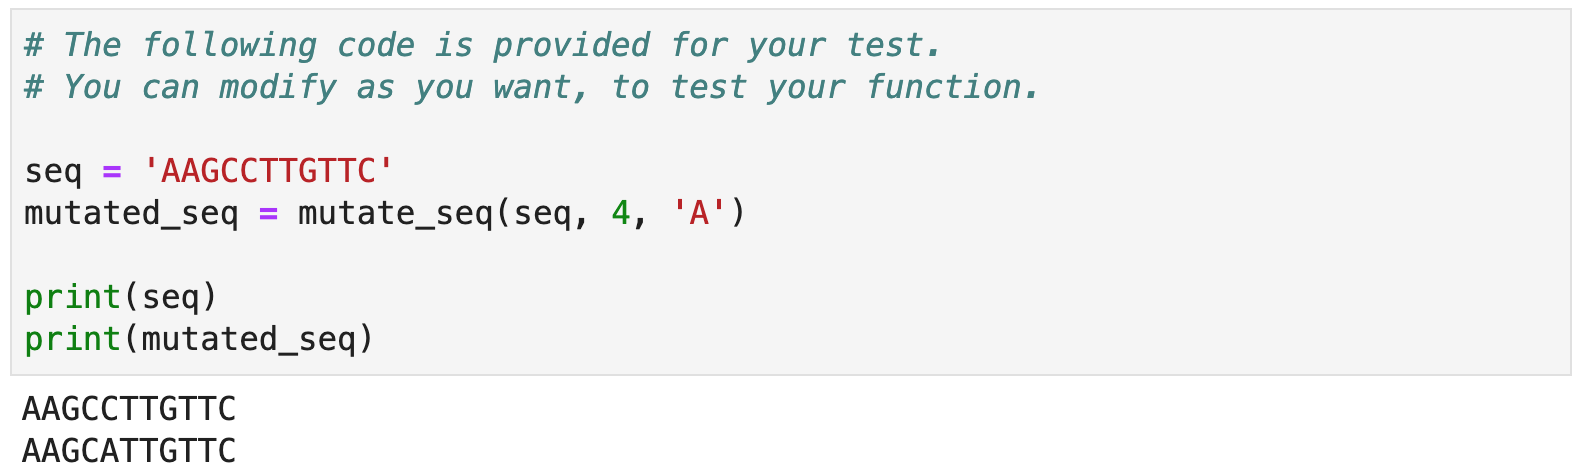

In [6]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def mutate_seq(seq, pos, base):
    return seq[:pos] + base + seq[pos+1:]

In [7]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

seq = 'AAGCCTTGTTC'
mutated_seq = mutate_seq(seq, 4, 'A')

print(seq)
print(mutated_seq)

AAGCCTTGTTC
AAGCATTGTTC


---

#### Problem 4 (3 pt)

This problem is exactly the same as Problem 3, except that your task is to implement it in the "Gene.py" module.

1. Open the `Gene.py` file in the same folder of this homework.
2. At the bottom of the script, you see the incomplete definition of `mutate_dna_seq()`.
3. Complete the function so that the dna sequence of the Gene object would be mutated.
4. **DO NOT CHANGE** the filename of `Gene.py`. Keep this file in the same folder as your `HW3_Lastname_Firstname.ipynb`.

The result should look like below.

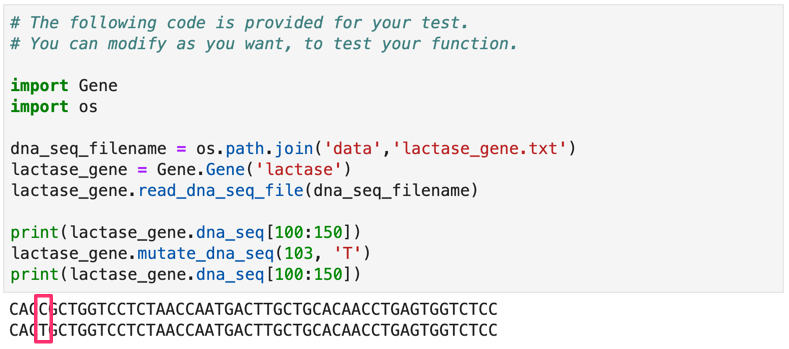

In [8]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

from Gene import Gene
import os

dna_seq_filename = os.path.join('data','lactase_gene.txt')
lactase_gene = Gene('lactase')
lactase_gene.read_dna_seq_file(dna_seq_filename)

print(lactase_gene.dna_seq[100:150])
lactase_gene.mutate_dna_seq(103, 'T')
print(lactase_gene.dna_seq[100:150])

CACCGCTGGTCCTCTAACCAATGACTTGCTGCACAACCTGAGTGGTCTCC
CACTGCTGGTCCTCTAACCAATGACTTGCTGCACAACCTGAGTGGTCTCC


---

#### Problem 5 (3 pt)

*Congenital lactase deficiency* is a rare genetic disorder that causes lactose intolerance from birth, particularly common in Finland. A mutation of the base at position 30049 (0-based: i.e., Python indexing) from T to A causes this disease. Here we check why this mutation is critical. Your task is to use the Gene.py module and complete the `examine_mutation()` function.

1. Read in lactase gene using the Gene.py module. (See the lecture note)
2. Generate protein sequence with normal lactase gene. (See the lecture note)
3. Confirm the protein length is 1927
4. Make mutation at 30049 from T to A. (Use the class method you wrote in Problem 4.
5. Generate protein sequence with this mutated gene. (See the lecture note)
6. Report the length of the protein.

The result should look like this.

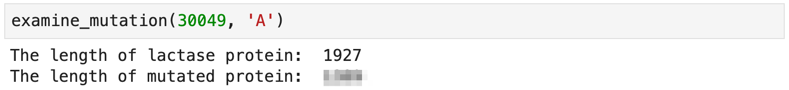

In [8]:
from Gene import Gene
import os

def examine_mutation(pos, base):
    dna_seq_filename = os.path.join('data','lactase_gene.txt')
    exon_position_filename = os.path.join('data', 'lactase_exon.tsv')
    mRNA_save_filename = os.path.join('output','lactase_mRNA.txt')
    translation_conversion_map_filename = os.path.join('data', 'conversion_map.tsv')

    # Make a Gene object
    lactase_gene = Gene('lactase')    # Fill in the blank space
    # Fill in this gap to create protein sequence
    lactase_gene.read_dna_seq_file(dna_seq_filename)
    lactase_gene.read_exon_positions(exon_position_filename)
    lactase_gene.create_mRNA()
    lactase_gene.read_translation_conversion_map(translation_conversion_map_filename)
    lactase_gene.create_protein_seq()

    
    seq = lactase_gene.protein_seq
    print("The length of lactase protein: ", len(seq))    # Fill the missing code
    
    # Mutate the gene, create mRNA seq and protein seq
    lactase_gene.mutate_dna_seq(pos, base)
    lactase_gene.create_mRNA()
    lactase_gene.create_protein_seq()
    
    seq = lactase_gene.protein_seq
    print("The length of mutated protein: ", len(seq))
    

In [9]:
examine_mutation(30049, 'A')

The length of lactase protein:  1927
The length of mutated protein:  1389


---
## **Check your code before you commit and push your homework**

### If there is any error in your code, including any practice code you wrote to test your answers, your homework will not be scored.

#### Here are steps you must take to make sure there is no error in your script.
1. You must first restart the kernel. It is in the menu "kernel->Restart Kernel". Or click the restart button.
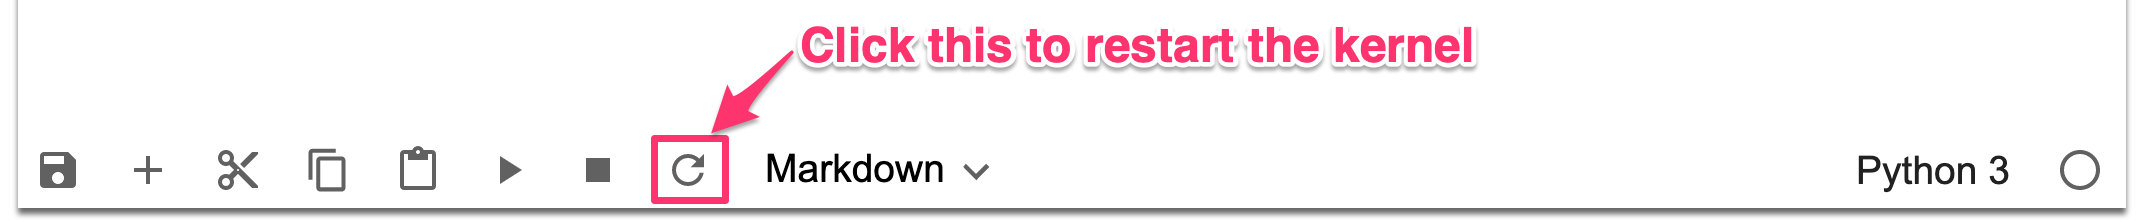
2. Run all cells. You can do this by clicking the menu "Run->Run all cells".
3. Fix any errors.
4. Repeate 1-3 until you don't see any errors.
5. **IMPORTNAT: Clear All Outputs (Right mouse click->Clear All Output)**
6. **IMPORTNAT: Save your file and change the filename to "HWn_Lastname_Firstname.ipynb"**
7. **Run the following cell and make sure you don't see any errors. This is the code that the TA or the instructor will use to generate testable code.**

In [11]:
# If the name of the student is Abraham Lincoln, then the code should look
# like below.

!jupyter nbconvert --to script 'HW3_Lincoln_Abraham.ipynb'
import HW3_Lincoln_Abraham as hw  # Change this to your name
dir(hw)

# After running this code, you should see, at the bottom, the function names
# of your homework answers.

# If you see errors, please make sure the file names, module names are all
# properly set up. Then restart the kernel and try it again.
